In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

%run Cali_25_1212/load_Results_12_15a.py

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli
from scipy import stats as stats



In [2]:
# first load 12_15a for T1, T2
M3 = pd.read_csv('Cali_25_1212/Cali_Mats/M3_Cali_Beta.csv') 
M4 = pd.read_csv('Cali_25_1212/Cali_Mats/M4_Cali_Beta.csv') 

M3 = M3.loc[:, ~M3.columns.str.contains('^Unnamed')]
M4 = M4.loc[:, ~M4.columns.str.contains('^Unnamed')]
#MaxI1 = np.median(M1, 0)
#MaxI2 = np.median(M2, 0)


In [3]:
X3 = M3.to_numpy().transpose()
X4 = M4.to_numpy().transpose()

In [6]:
from matplotlib.pyplot import figure 
from numpy import array

def reli( pred, y ):
    bns= array([ 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65 ,.7, .75, .8   ])
    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram( pred,   y, bins = bns, marker_size=100)

In [7]:
%run Cali_25_1212/Cali_Func.py


In [8]:
MedI3 = np.median(M3, 0)
MedI4 = np.median(M4, 0)
MaxI3 = np.max(M3, 0)
MaxI4 = np.max(M4, 0)

In [11]:
( confusion_matrix (tgold3,  MedI3>.5) )
 

array([[12579,     7],
       [  152,     1]], dtype=int64)

In [12]:
( confusion_matrix (tgold4,  MedI4>.5) )


array([[10545,    10],
       [   95,     1]], dtype=int64)

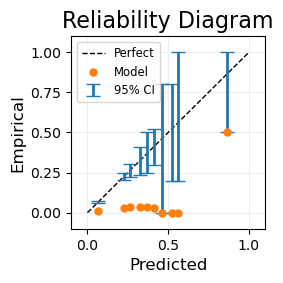

In [50]:
reli(M_test3['golds'], M3.mean(0))


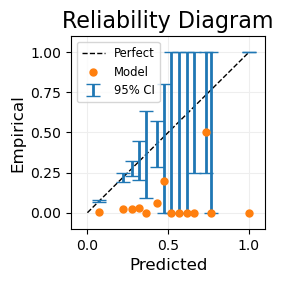

In [51]:
reli(M_test4['golds'], MaxI4)


In [83]:
confusion_matrix(M_test4['golds'], MaxI4>.5)


array([[11565,    15],
       [   99,     2]], dtype=int64)

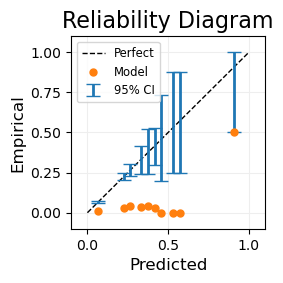

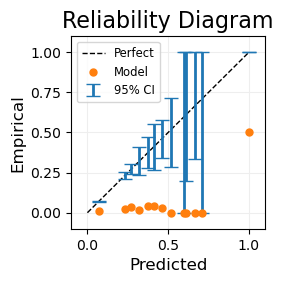

In [52]:
 
UQ3 = np.apply_along_axis(trim_upper_c, 1, X3)
LQ3 = np.apply_along_axis(trim_lower_c, 1, X3)
reli(M_test3['golds'], UQ3)
reli(M_test3['golds'], LQ3)


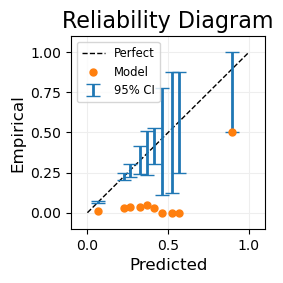

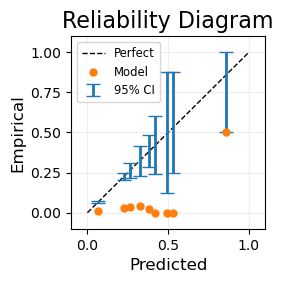

In [85]:
reli(M_test3['golds'], np.apply_along_axis(trim_upper, 1, X3))
reli(M_test3['golds'], np.apply_along_axis(trim_lower, 1, X3))

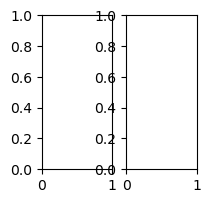

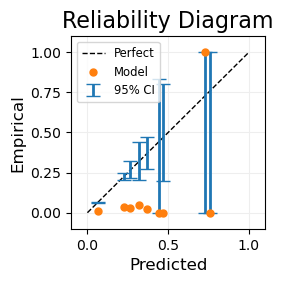

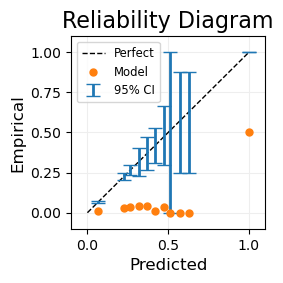

In [86]:
#plt.subplots(1,2,figsize = (2,2))
reli(M_test3['golds'], np.apply_along_axis(trim_upper_b, 1, X3))
reli(M_test3['golds'], np.apply_along_axis(trim_lower_b, 1, X3))

In [84]:
confusion_matrix(M_test3['golds'], np.apply_along_axis(trim_upper_b, 1, X3)>.5)


array([[12675,     1],
       [  152,     1]], dtype=int64)

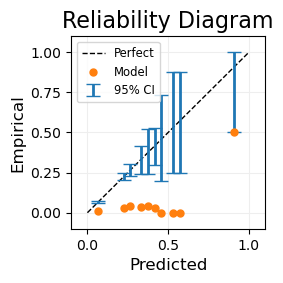

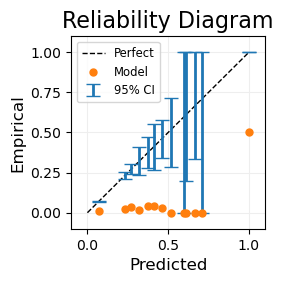

In [59]:
reli(M_test3['golds'], np.apply_along_axis(trim_upper_c, 1, X3))
reli(M_test3['golds'], np.apply_along_axis(trim_lower_c, 1, X3))

In [ ]:
reli(M_test3['golds'], np.apply_along_axis(trim_upper_c, 1, X3))
reli(M_test3['golds'], np.apply_along_axis(trim_lower_c, 1, X3))

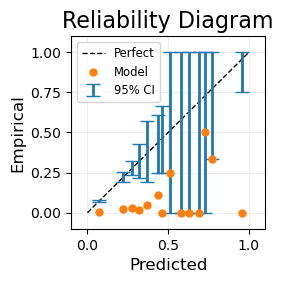

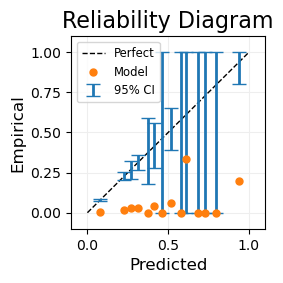

In [63]:
 
UQ4 = np.apply_along_axis(trim_upper_c, 1, X4)
LQ4 = np.apply_along_axis(trim_lower_c, 1, X4)
reli(M_test4['golds'], UQ4)
reli(M_test4['golds'], LQ4)


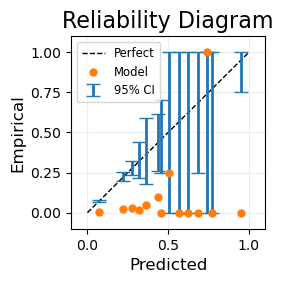

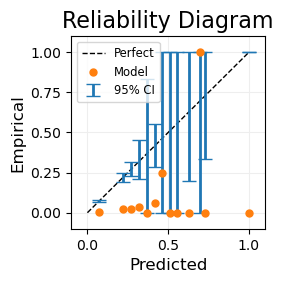

In [62]:
UQ4b = np.apply_along_axis(trim_upper, 1, X4)
LQ4b = np.apply_along_axis(trim_lower, 1, X4)
reli(M_test4['golds'], UQ4b)
reli(M_test4['golds'], LQ4b)


In [74]:
O4 =  np.where ( X4.mean(1)>.5, UQ4, UQ4b)

array([[11563,    17],
       [   98,     3]], dtype=int64)

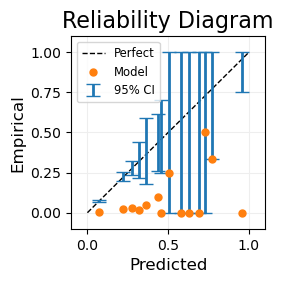

In [78]:
reli(M_test4['golds'], O4)
( confusion_matrix (tgold4,  O4>.5) )

In [80]:
( confusion_matrix (tgold4,  LQ4>.5) )

array([[11515,    65],
       [   95,     6]], dtype=int64)

In [81]:
( confusion_matrix (tgold4,  X4.mean(1)>.5) )

array([[11565,    15],
       [   99,     2]], dtype=int64)

In [76]:
O4b =  np.where ( X4.max(1)>.5, UQ4, UQ4b)

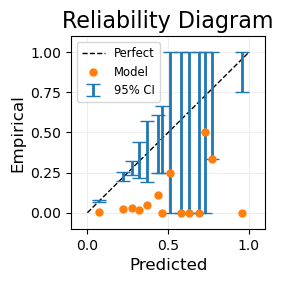

In [77]:
reli(M_test4['golds'], O4b)


{'pred_probs': array([0.00393237, 0.07101728, 0.13664752, 0.1739105 , 0.20966507,
        0.27850079, 0.3256813 , 0.38111912, 0.43123142, 0.48214899,
        0.53032778, 0.59607944, 0.62222708, 0.67370648, 0.72545409,
        0.7785725 , 0.82427583, 0.86519502, 0.92548439, 0.99832953]),
 'emp_probs': array([0.02719651, 0.16666667, 0.        , 0.17647059, 0.09090909,
        0.2       , 0.33333333, 0.        , 0.        , 0.25      ,
        0.25      , 0.        , 0.        , 0.2       , 0.25      ,
        0.        , 0.125     , 0.2       , 0.        , 0.05430464]),
 'bin_counts': array([1.5149e+04, 2.4000e+01, 1.5000e+01, 1.7000e+01, 1.1000e+01,
        5.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 8.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 4.0000e+00,
        1.2000e+01, 8.0000e+00, 1.0000e+01, 1.7000e+01, 7.5500e+02])}

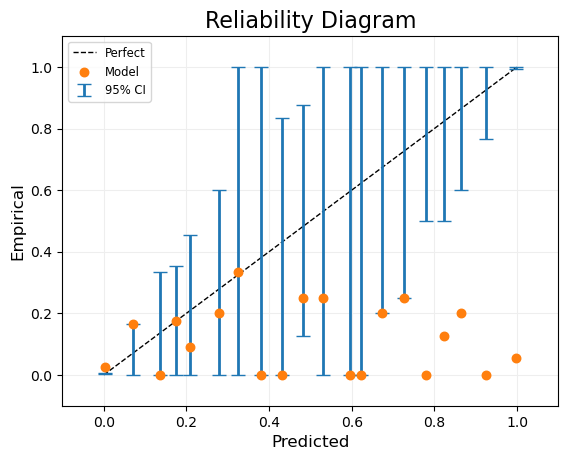

In [73]:
mli.plot_reliability_diagram(M_test1['golds'], MaxI1, marker_size=150)


In [78]:

def trim_upper(data, proportiontocut, qua):
    """
    Calculates the trimmed median of a dataset.
    Parameters:
        data (list or array-like): The dataset to calculate the trimmed median for.
        proportiontocut (float): The proportion of data to trim from each end. 
                                  Defaults to 0.1 (10%).
                                          Returns:
        float: The trimmed median.
    """
    sorted_data = np.sort(data)
    n = len(sorted_data)
    k = int(n * proportiontocut)
    return np.quantile(sorted_data[0:n-k], qua)

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
print(trim_upper(data, 0.1, .6))

6.3999999999999995


(array([15050.,    71.,    51.,    41.,    22.,    19.,    35.,    47.,
           73.,   649.]),
 array([3.01572148e-06, 1.00002502e-01, 2.00001987e-01, 3.00001473e-01,
        4.00000959e-01, 5.00000445e-01, 5.99999931e-01, 6.99999416e-01,
        7.99998902e-01, 8.99998388e-01, 9.99997874e-01]),
 <BarContainer object of 10 artists>)

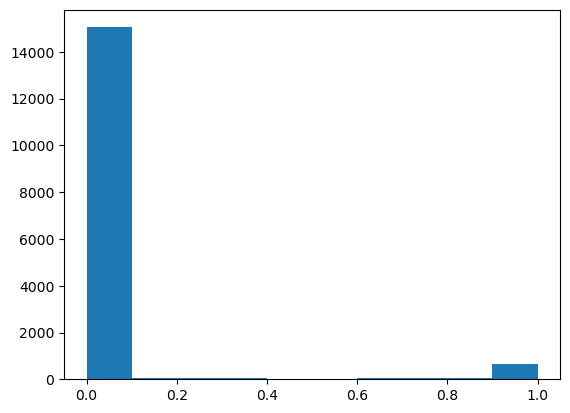

In [70]:
means1 = M1.mean(0)
plt.hist( means1)

In [66]:
means2 = M2.mean(0)

(array([1.3864e+04, 5.6000e+01, 3.1000e+01, 2.8000e+01, 2.0000e+01,
        1.3000e+01, 1.4000e+01, 2.1000e+01, 3.0000e+01, 9.4000e+01]),
 array([5.89509166e-04, 1.00499201e-01, 2.00408892e-01, 3.00318583e-01,
        4.00228275e-01, 5.00137966e-01, 6.00047658e-01, 6.99957349e-01,
        7.99867040e-01, 8.99776732e-01, 9.99686423e-01]),
 <BarContainer object of 10 artists>)

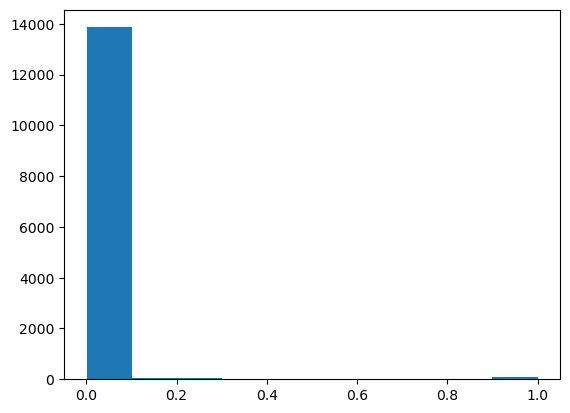

In [68]:
plt.hist( means2)

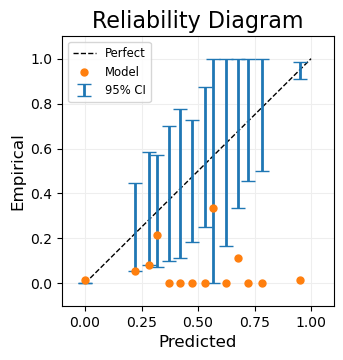

In [65]:
#m2 = stats.tmean(M2, (.1, .8), axis = 0)

m2 = np.quantile(M2,.675 , 0)

reli(M_test2['golds'], m2)


In [ ]:
# first load 12_12 for T3, T4


In [2]:
import matplotlib.pyplot as plt

def plotter (p_i, y_i):
    plt.figure(figsize=(5, 5))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot(p_i, y_i, 's-')
    ax1.plot([0, 1], [0, 1], linestyle='--', 
             color='grey', label='random guess (AUROC: 0.500)')
    ax2.hist(p_i, bins=10, range=(0, 1))
    ax1.set_xlim([-0.01, 1.01])
    ax1.set_ylim([-0.01, 1.01])
    ax1.set_xlabel('Predicted value')
    ax1.set_ylabel('Fraction of positive')
    ax1.set_title("Calibration plot")
    ax2.set_xlabel('Prediction probability')
    ax2.set_ylabel('Count')
    plt.tight_layout()
    

In [3]:
def temperature_scaling(logits, y):
    def temperature_obj(t):
        temp_logits = logits / (t )
        return log_loss(y, temp_logits)
    
    res = minimize_scalar(temperature_obj)
    return logits / (res.x )

In [4]:
src_path = "G:\\FillmoreCancerData\\markhe\\VTERisk" 
src_path2 = "G:\\FillmoreCancerData\\markhe\\VTERisk - Copy" 

def md5(key):
    return hashlib.md5(repr(key).encode()).hexdigest()
testDF = pd.read_csv(os.path.join(src_path2, 'Notebooks/Find/fixed_dx.csv'))
pat_ids = (testDF['patient_id'] ).astype(int)
testDF['pids'] = pat_ids.apply(md5)

In [5]:
def compute_calibration_curve(golds_for_eval,Probs_for_eval):
    prob_true, prob_pred = calibration_curve(golds_for_eval, Probs_for_eval, n_bins=20)
    return prob_true, prob_pred


In [6]:
def get_4Ms(M):
    M1 = M.drop_duplicates(['patient_id'])
    m0 = M.duplicated(['patient_id'])
    M234 = M[m0]
    M2 = M234.drop_duplicates(['patient_id'])

    m00 = M234.duplicated(['patient_id'])
    M34 = M234[m00]
    M3 = M34.drop_duplicates(['patient_id'])

    m000 = M34.duplicated(['patient_id'])
    M4 = M34[m000]
    return M1, M2, M3, M4

In [7]:
tdf = pd.DataFrame({'patient_id': (testDF['patient_id'] ),    
                    'pids': (testDF['pids'] ),    
                  'dob': (testDF['dob'] ),  
                  'outcome_date': (testDF['outcome_date'] ), 
                  'obs_time_end': (testDF['obs_time_end'] ),  
                  'index_date': (testDF['index_date'] ),  
                  'diag_date': (testDF['diag_date'] ),  
                  'outcome': (testDF['outcome'])    })

In [8]:
def logit (p): return np.log(  p / (1 - p) )
def expit (p): return   np.exp(p)/(1 + np.exp(p))

In [9]:
devpath = os.path.join(src_path ,'logs_transformer_vte/L/12_12/', "68e9a10a80da6c966c226a57b3ccf0fb.results.dev_preds")

with open(devpath, 'rb') as f:
    R = pickle.load(f)
    p = np.array(R['probs'])

Df = pd.DataFrame.from_dict(R)
Df['probs'] = Df['probs'].astype(float)
Df['exams'] = Df['exams'].astype(int)
M = pd.merge(tdf, Df)
M1, M2, M3, M4 = get_4Ms(M)

In [10]:
testpath = os.path.join(src_path ,'logs_transformer_vte/L/12_12/', "68e9a10a80da6c966c226a57b3ccf0fb.results.test_preds")
with open(testpath, 'rb') as f:
    R_t = pickle.load(f)

Df_test = pd.DataFrame.from_dict(R_t)
Df_test['probs'] = Df_test['probs'].astype(float)
M_test = pd.merge(tdf, Df_test)
M_test1, M_test2, M_test3, M_test4 = get_4Ms(M_test)

In [11]:
mp0 = np.array(M['probs'])
mp1 = np.array(M1['probs'])
mp2 = np.array(M2['probs'])
mp3 = np.array(M3['probs'])
mp4 = np.array(M4['probs'])

gold0 =   np.array(M['golds'],dtype = int)
gold1 =   np.array(M1['golds'],dtype = int)
gold2 =   np.array(M2['golds'],dtype = int)
gold3 =   np.array(M3['golds'],dtype = int)
gold4 =   np.array(M4['golds'],dtype = int)


tp= np.array(M_test['probs'])
tp1 = np.array(M_test1['probs'])
tp2 = np.array(M_test2['probs'])
tp3 = np.array(M_test3['probs'])
tp4 = np.array(M_test4['probs'])

tgold1 =   np.array(M_test1['golds'],dtype = int)
tgold2 =   np.array(M_test2['golds'],dtype = int)
tgold3 =   np.array(M_test3['golds'],dtype = int)
tgold4 =   np.array(M_test4['golds'],dtype = int)
tgold0 =   np.array(M_test['golds'],dtype = int)

In [ ]:
import matplotlib.pyplot as plt

def plotter (p_i, y_i):
    plt.figure(figsize=(5, 5))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    ax1.plot(p_i, y_i, 's-')
    ax1.plot([0, 1], [0, 1], linestyle='--', 
             color='grey', label='random guess (AUROC: 0.500)')
    ax2.hist(p_i, bins=10, range=(0, 1))
    ax1.set_xlim([-0.01, 1.01])
    ax1.set_ylim([-0.01, 1.01])
    ax1.set_xlabel('Predicted value')
    ax1.set_ylabel('Fraction of positive')
    ax1.set_title("Calibration plot")
    ax2.set_xlabel('Prediction probability')
    ax2.set_ylabel('Count')
    plt.tight_layout()
    

(array([1410., 2311., 2676., 2878., 2571., 2040., 1327.,  613.,  195.,
          39.]),
 array([0.0152325 , 0.05968204, 0.10413157, 0.14858111, 0.19303064,
        0.23748018, 0.28192971, 0.32637925, 0.37082878, 0.41527832,
        0.45972785]),
 <BarContainer object of 10 artists>)

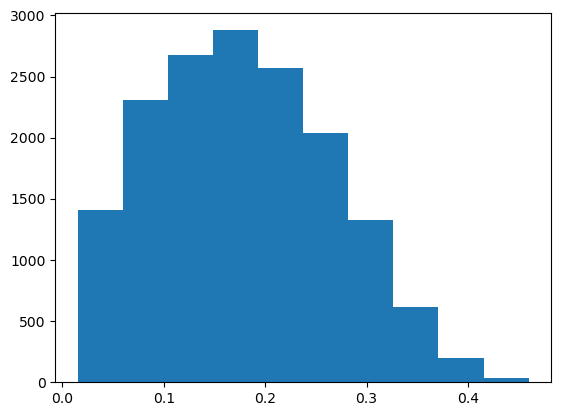

In [16]:
plt.hist(mp1)

In [12]:
y1, p1 = compute_calibration_curve(M_test1['golds'], tp1 )
y2, p2 = compute_calibration_curve(M_test2['golds'], tp2 )
y3, p3 = compute_calibration_curve(M_test3['golds'], tp3 )
y4, p4 = compute_calibration_curve(M_test4['golds'], tp4 )


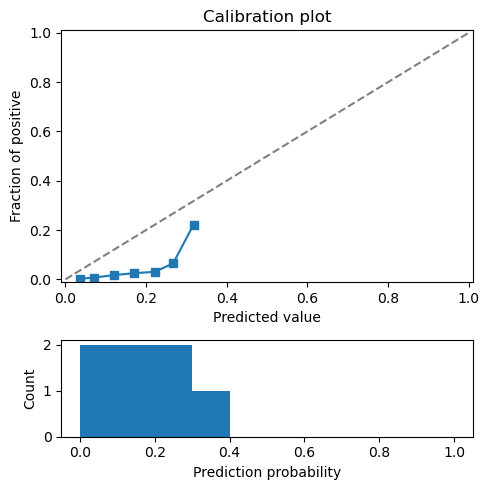

In [13]:
plotter(p4, y4)

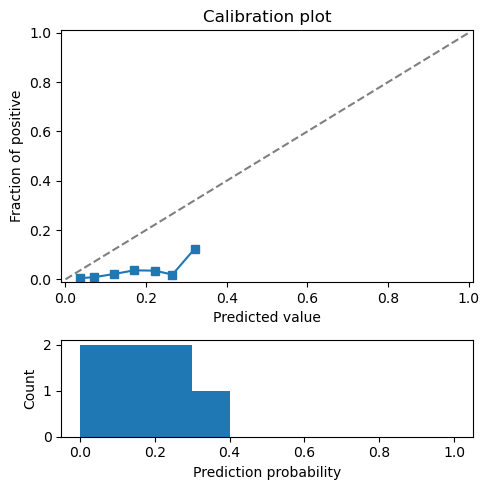

In [17]:
plotter(p3, y3)

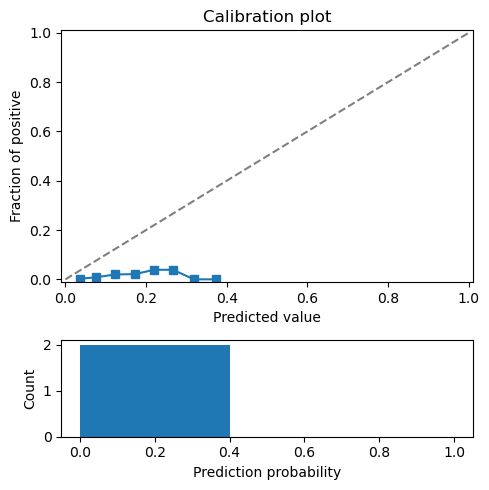

In [18]:
plotter(p2, y2)

In [1]:
plotter(p1, y1)

NameError: name 'plotter' is not defined

In [24]:
import sklearn
from sklearn.metrics import confusion_matrix

In [27]:
sklearn.metrics.roc_auc_score(tgold1,  tc1 , average = 'samples')


0.6667921165559247

In [28]:
sklearn.metrics.roc_auc_score(tgold2,  tc2 , average = 'samples')


0.6764938403022082

In [29]:
sklearn.metrics.roc_auc_score(tgold3,  tc3 , average = 'samples')


0.7132108023602834

In [30]:
sklearn.metrics.roc_auc_score(tgold4,  tc4 , average = 'samples')


0.754709382855384

In [31]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[6778, 8874],
       [  95,  385]], dtype=int64)

In [32]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[11112,  2894],
       [  133,    87]], dtype=int64)

In [33]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12240,   436],
       [  139,    14]], dtype=int64)

In [34]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[11578,     2],
       [  101,     0]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [27]:
m1.to_csv('output/XCoh_Sen.csv') 

In [34]:
#m1.to_excel('output/dxMD_Sensitivity90.xlsx') 

In [39]:
y1 = np.array(M1['golds'],dtype = int)
x1 = M1['probs'].to_numpy()
platt.fit(x1, y1)
cal_1 = platt.predict(M_test1['probs'])